In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.subplots as sp
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv('listings.csv')
print(df.columns)
df.head()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


# Exploratory data analysis (EDA)

In [ ]:
# Step 1: Data Cleaning
#Data Quality: The data cleaning steps, such as handling missing values and removing duplicates,
# ensure data quality and improve the reliability of the analysis. This indicates a concern for accurate and reliable insights.
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)
    df=df[['name','latitude','neighbourhood','longitude','price','availability_365','room_type','minimum_nights','calculated_host_listings_count']]

    null_sum = df.isnull().sum()

    if null_sum.sum() > 0:
        # Function to handle missing values
        def handle_missing_values(df):
            imputer = SimpleImputer(strategy='mean')  # Replace missing values with column mean
            numeric_columns = df.select_dtypes(include='number').columns
            df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
            return df

        df = handle_missing_values(df)



    duplicate_values = df.duplicated().sum()

    if duplicate_values.sum() > 0:
        # Function to handle missing values
        def handle_duplicate_values(df):
            # Remove duplicate rows
            df.drop_duplicates(inplace=True)
            return df

        df = handle_duplicate_values(df)



    return df
df=wrangle('listings.csv')
print(df.columns)
df.head()

Index(['name', 'latitude', 'neighbourhood', 'longitude', 'price',
       'availability_365', 'room_type', 'minimum_nights',
       'calculated_host_listings_count'],
      dtype='object')


,name,latitude,neighbourhood,longitude,price,availability_365,room_type,minimum_nights,calculated_host_listings_count
0,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,52.36435,Oostelijk Havengebied - Indische Buurt,4.94358,69,7,Private room,3,1
1,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,52.36407,Centrum-Oost,4.89393,106,0,Private room,1,2
2,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,52.35150,De Pijp - Rivierenbuurt,4.89656,270,2,Entire home/apt,4,1
3,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,52.36420,Oud-Oost,4.92829,200,0,Entire home/apt,3,1
4,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,52.38761,Centrum-West,4.89188,137,0,Private room,3,1


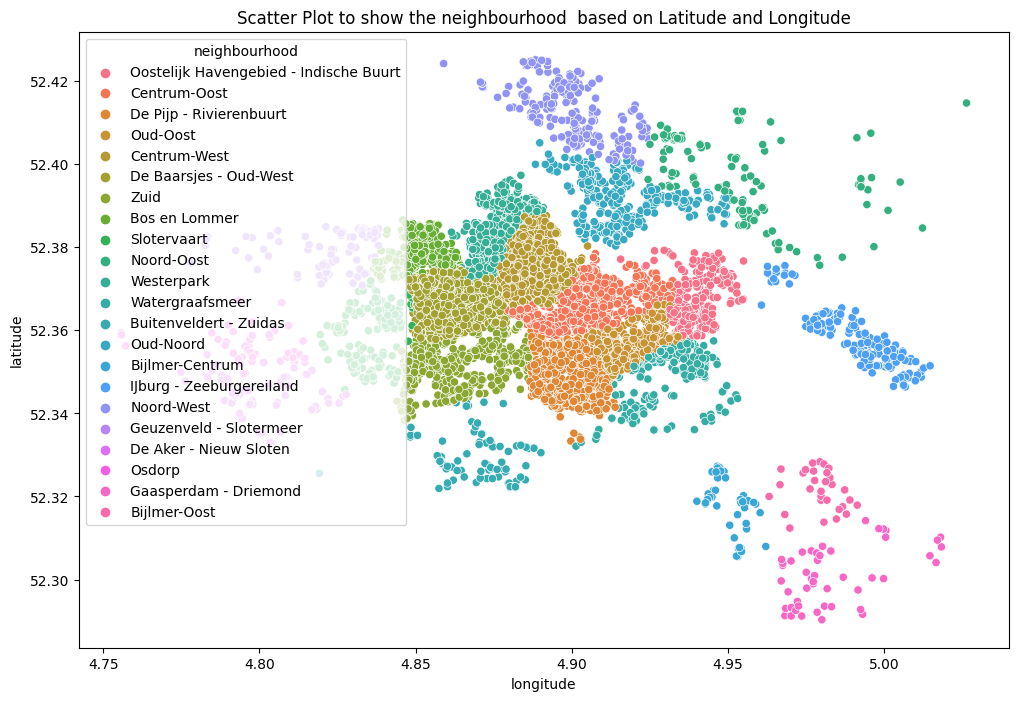

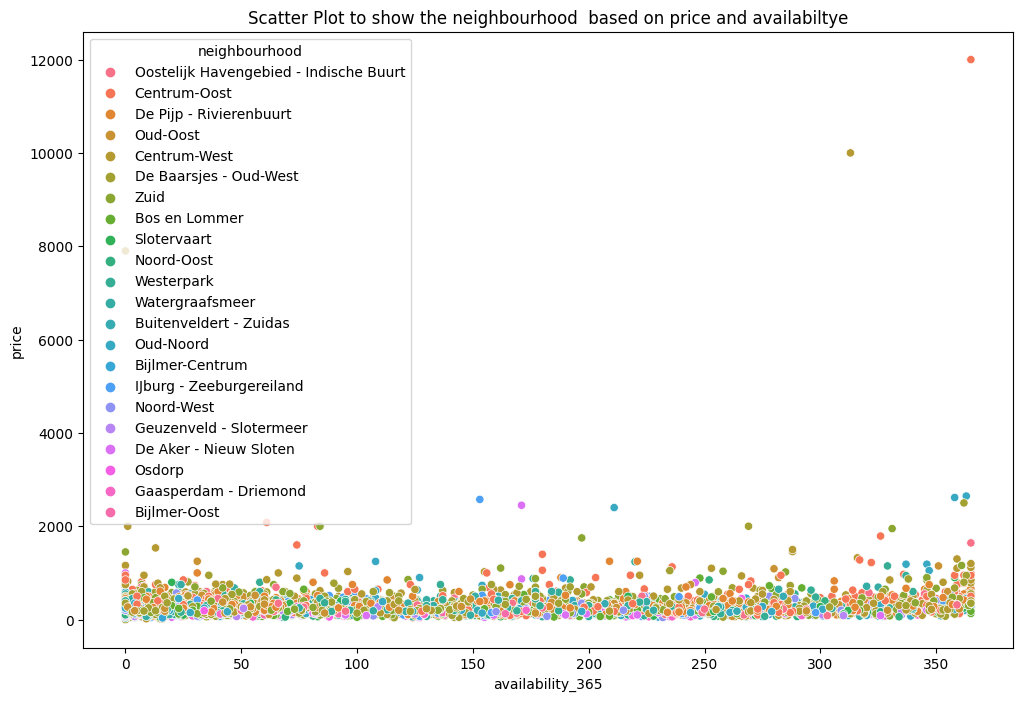

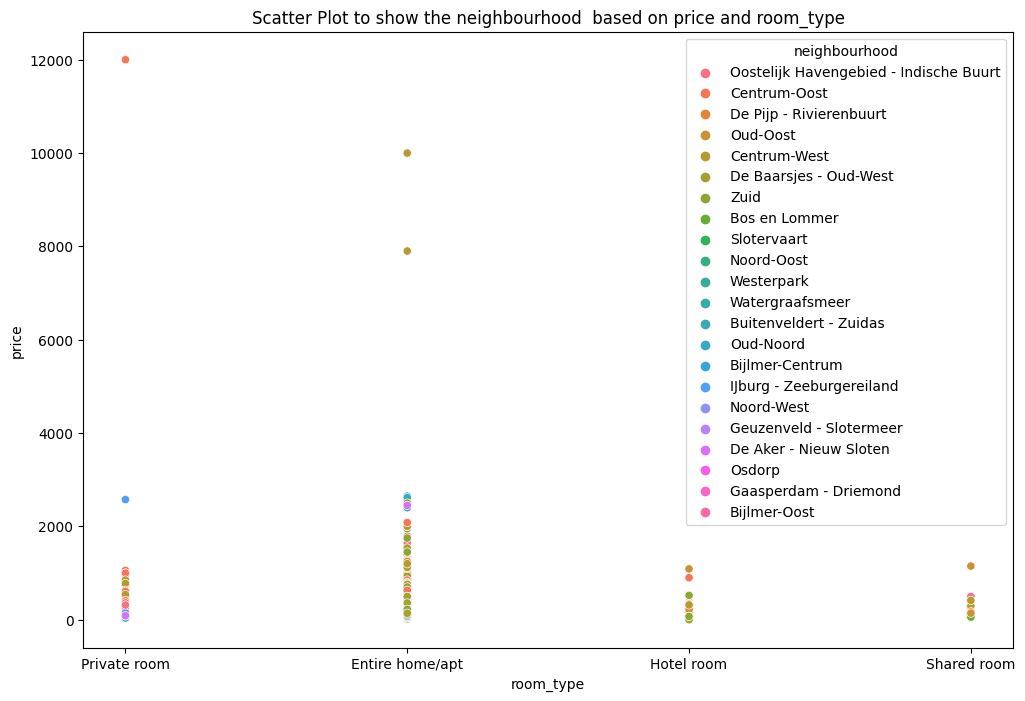

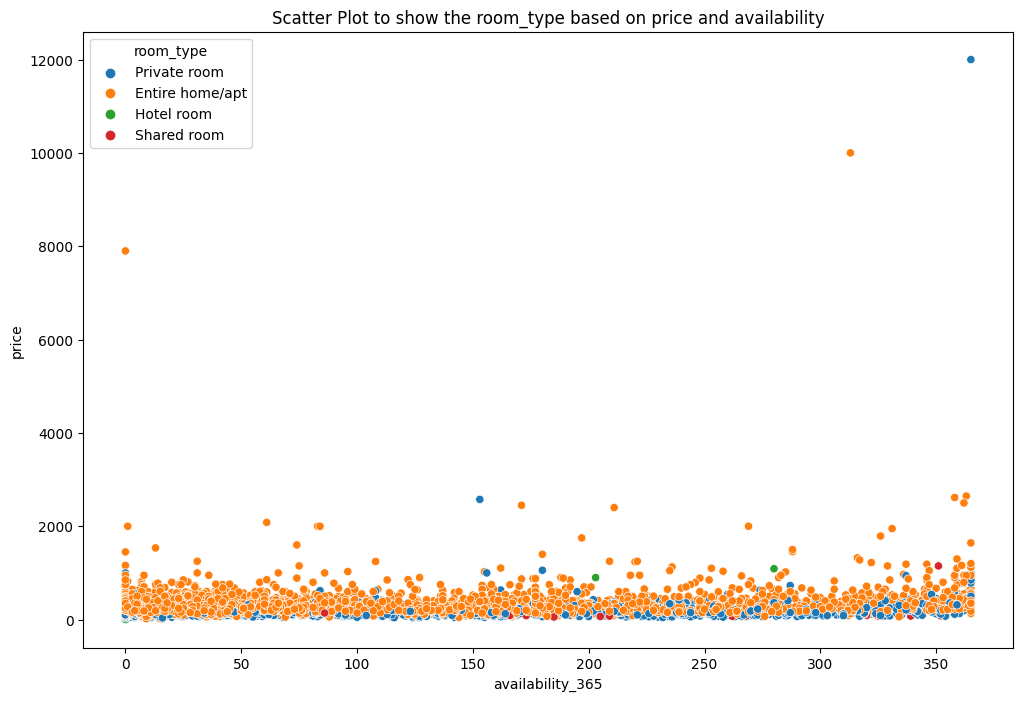

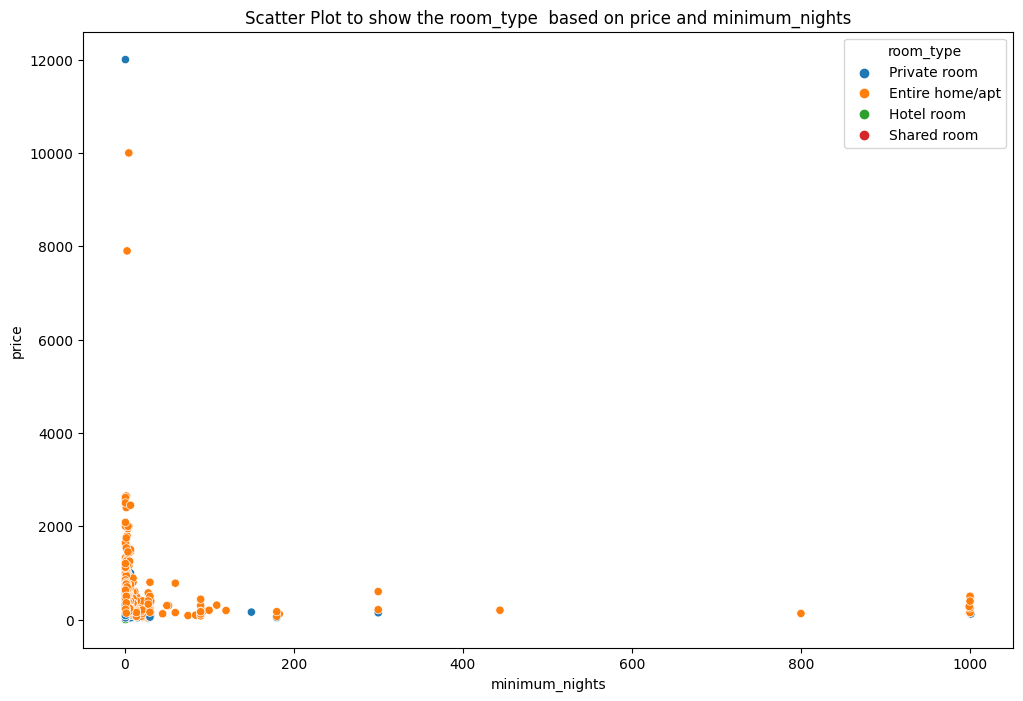

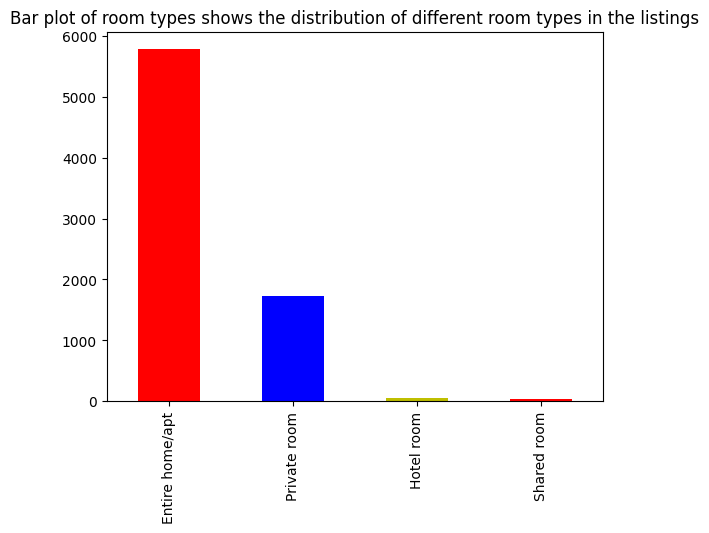

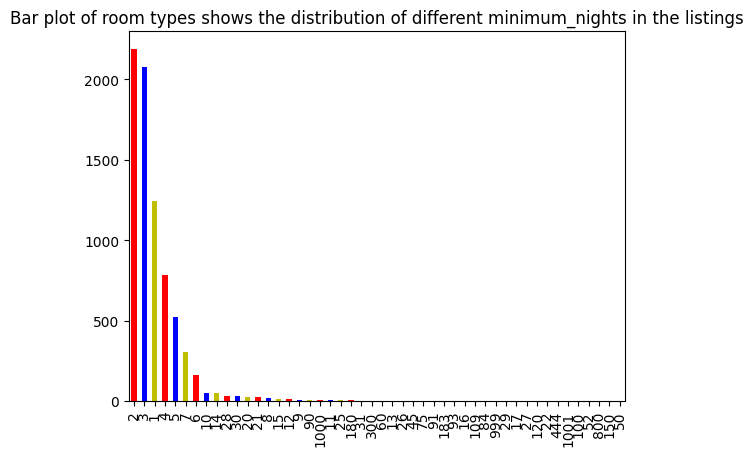

<Figure size 1000x1000 with 0 Axes>

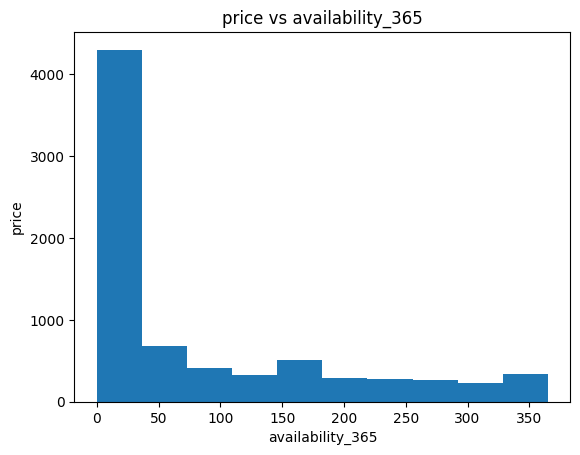

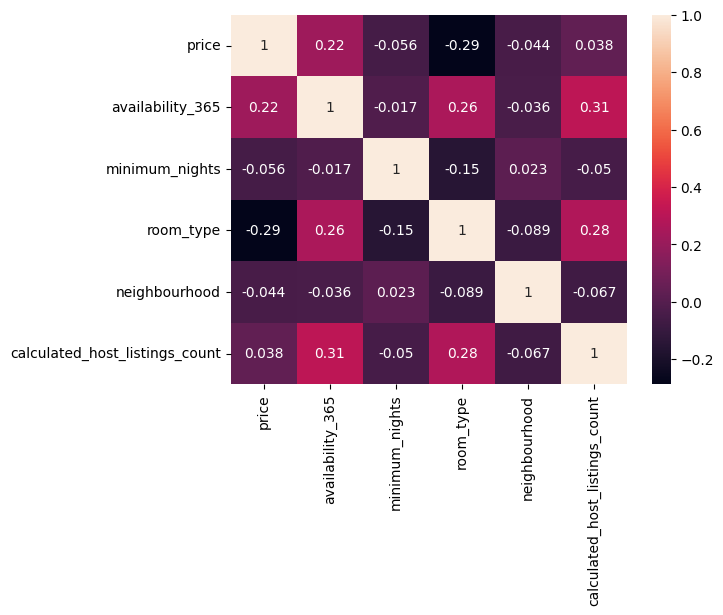

mean_price 251.06558885383808
mean_availability 79.58661934805468
median_price 202.0
median_availability 21.0
Mode of price 0    250
Name: price, dtype: int64
Mode of availability 0    0
Name: availability_365, dtype: int64
Mode of room_type 0    Entire home/apt
Name: room_type, dtype: object
              price  availability_365  minimum_nights
count   7608.000000       7608.000000     7608.000000
mean     251.065589         79.586619        4.914564
std      263.170218        106.483001       33.263777
min        0.000000          0.000000        1.000000
25%      148.000000          0.000000        2.000000
50%      202.000000         21.000000        3.000000
75%      300.000000        145.000000        4.000000
max    12000.000000        365.000000     1001.000000


In [ ]:
# Step 2: Visualization
def Visualization(df):
#Geographical Distribution: The scatter plots on a map and based on latitude/longitude reveal the geographical distribution of the listings.
# It can help identify areas with higher concentrations of listings and potentially indicate popular or desirable locations.
#It describes each apartment with any information the user wants to know, such as “price”, “name”, “availability_365”, “room_type”, “neighborhood”


  fig = px.scatter_mapbox(
      df,  # Our DataFrame
      lat='latitude',
      lon='longitude',
      width=600,  # Width of map
      height=600,  # Height of map
      color='price',
      hover_data=['price','name','availability_365','room_type','neighbourhood'],  # Display price when hovering mouse over house
  )

  fig.update_layout(mapbox_style="open-street-map")

  fig.show()



  #Scatter Plot to show the neighbourhood based on Latitude and Longitude
  # The scatter plots based on neighborhood and other variables can provide insights
  #into the relationship between neighborhoods and listing characteristics.
  #It can help identify neighborhoods with higher or lower prices, availability, or specific room types.
  plt.figure(figsize=(12,8))
  sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood)
  plt.title  ('Scatter Plot to show the neighbourhood  based on Latitude and Longitude');
  plt.show()




  #Scatter Plot to show the neighbourhood  based on price and availabilty
  #Neighborhood Analysis: The scatter plots based on neighborhood and other variables
  #can provide insights into the relationship between neighborhoods and  price and availabilty.
  #It can help identify neighborhoods with higher or lower prices, availability.
  plt.figure(figsize=(12,8))
  sns.scatterplot(x=df.availability_365,y=df.price,hue=df.neighbourhood)
  plt.title  ('Scatter Plot to show the neighbourhood  based on price and availabiltye');
  plt.show()

  #Scatter Plot to show the neighbourhood  based on price and room_type
  #can provide insights into the relationship between neighborhoods and  price and availabilty.
  #It can help identify neighborhoods with higher or lower prices, and  specific room types.
  plt.figure(figsize=(12,8))
  sns.scatterplot(x=df.room_type ,y=df.price,hue=df.neighbourhood)
  plt.title  ('Scatter Plot to show the neighbourhood  based on price and room_type');
  plt.show()


  #Scatter Plot to show the room_type  based on price and neighbourhood
  #can provide insights into the relationship between neighborhoods and  price and availabilty.
  #It can help identify room_type with higher or lower price and neighbourhood.
  plt.figure(figsize=(12,8))
  sns.scatterplot(x=df.availability_365 ,y=df.price,hue=df.room_type)
  plt.title  ('Scatter Plot to show the room_type based on price and availability');
  plt.show()


  #Scatter Plot to show the room_type  based on price and minimum_nights
  #can provide insights into the relationship between neighborhoods and  price and availabilty.
  #It can help identify room_type with higher or lower price and minimum_nights.
  plt.figure(figsize=(12,8))
  sns.scatterplot(x=df.	minimum_nights ,y=df.price,hue=df.room_type)
  plt.title  ('Scatter Plot to show the room_type  based on price and minimum_nights');
  plt.show()






  #The bar plot of room types shows the distribution of different room types in the listings.
  # It can provide insights into the popularity of different types of accommodations and their availability in the dataset.
  df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
  plt.title  ('Bar plot of room types shows the distribution of different room types in the listings');
  plt.show()





  #The bar plot of minimum_nights shows the distribution of different room types in the listings.

  df['minimum_nights'].value_counts().plot(kind='bar',color=['r','b','y'])
  plt.title  ('Bar plot of room types shows the distribution of different minimum_nights in the listings');
  # Figure Size
  fig = plt.figure(figsize =(10, 10))
  plt.show()






  # Create 3D scatter plot

  fig = px.scatter_3d(
      df,
      x='room_type',
      y='availability_365',
      z="price",

      labels={'room_type': 'room_type', 'availability_365': "lavailability_count", "price": "price"},
      width=600,
      height=500
  )

  # Refine formatting
  fig.update_traces(
      marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
      selector={"mode": "markers"},
  )

  # Display figure
  fig.show()


  df1=df[['price','availability_365','minimum_nights','calculated_host_listings_count']]

#Availability Analysis: The histogram of availability provides insights into the distribution of availability across the listings.
# It can help identify whether most listings have high or low availability and if there are any patterns or trends related to availability.
  plt.hist(df['availability_365']);
  plt.xlabel ('availability_365') ;
  plt.ylabel ('price') ;
  plt.title  ('price vs availability_365');
  plt.show()
Visualization(df)


# Step 3: Statistical Analysis
def Statistical(df):
  #Correlation Analysis: The correlation matrix and heatmap provide insights into the relationships between different variables in the dataset.
  #It can help identify variables that are strongly correlated,
  # which can be useful for feature selection or identifying potential factors influencing price or availability.

  df2=df[['price','availability_365','minimum_nights', 'room_type', 'neighbourhood','calculated_host_listings_count']]
  label_encoder = LabelEncoder()
  df_encoded = df2.apply(label_encoder.fit_transform)

  correlation_matrix = df_encoded.corr()
  sns.heatmap(correlation_matrix, annot=True)
  plt.show()


  #calculate the mean of price,availability
  #The mean is a measure of central tendency that provides the average value of a dataset,where
#provides insights interpretations like Representative Value, Balance Point, Arithmetic Center, Expected Value
  mean_price = np.mean(df['price'])
  mean_availability = np.mean(df['availability_365'])
  #The median is a measure of central tendency that represents the middle value in a dataset where
#provides insights interpretations like Central Value, Resistant to Outliers, 50th Percentile, Ordinal Data,  Robust Measure
  median_price = np.median(df['price'])
  median_availability = np.median(df['availability_365'])
  print('mean_price', mean_price)
  print('mean_availability', mean_availability)
  print('median_price', median_price)
  print('median_availability', median_availability)


  #The mode is a measure of central tendency that represents the most frequently occurring value or values in a dataset, where
#provides insights interpretations like Most Common Value, Peak of Distribution, Categorical Variables,
# Multimodal Distributions, Useful for Descriptive Analysis
  mode_values_price = pd.Series(df['price']).mode()
  print('Mode of price', mode_values_price)
  mode_values_availability = pd.Series(df['availability_365']).mode()
  print('Mode of availability', mode_values_availability)
  mode_values_room_type = pd.Series(df['room_type']).mode()
  print('Mode of room_type', mode_values_room_type)
Statistical(df)

# Summary statistics
#The summary statistics provide a numerical summary of the selected columns,
#including count, mean, standard deviation, minimum, quartiles, and maximum values.
#It helps in understanding the distribution and range of values for these variables.
summary_stats = df[['price','availability_365','room_type','minimum_nights','neighbourhood']].describe()
print(summary_stats)